## Import Pandas

In [2]:
import pandas as pd

# os brauchen wir um dem System zu zeigen, wo die Files, die ich in ein csv-File packen will
import os

## Combined txt-files and read the combined csv-file

In [3]:
# Ich mache eine leere Liste
directory = "./names"
dfs = []
# For-Loop: für jeden Filename in diesem Ordner (Varible directory - siehe oben)
# wenn der filename mit ".txt" endet:
# dann mach mir eine  neue Variable year und nimm dafür aus dem Filenamen die letzten vier Stellen (3:7 heißt, gib die ersten drei von 7 Stellen weg) -   (weil Name ist ja 'yob1880.txt' -> '1880')
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        year = filename[3:7]
        file_path = os.path.join(directory, filename)
        # mach mir aus dem Inhalt ein Dataframe
        with pd.option_context('display.max_colwidth', None):
            df = pd.read_csv(file_path, names=["Name", "Gender", "Count"])
        # mach mir eine neue Spalte mit dem Jahr
        df['Year'] = int(year)
        # hämg mir alle Files in eines zusammen
        dfs.append(df)
# mach mir ein neues Dataframe combined_data
combined_data = pd.concat(dfs, ignore_index=True)
# sortiere mir das neue dataframe nach Jahr und alphabetisch nach Name
combined_data = combined_data.sort_values(by=["Year", "Name"])
# Speichere das in einem neuen csv-File ab mit dem Namen combined_babynames.csv
combined_data.to_csv("combined_babynames.csv", index=False)

In [4]:
# read new combinated file
df = pd.read_csv("combined_babynames.csv")

df.head(10)

,Name,Gender,Count,Year
0,Aaron,M,102,1880
1,Ab,M,5,1880
2,Abbie,F,71,1880
3,Abbott,M,5,1880
4,Abby,F,6,1880
5,Abe,M,50,1880
6,Abel,M,9,1880
7,Abigail,F,12,1880
8,Abner,M,27,1880
9,Abraham,M,81,1880


### Format column count as integer

In [5]:
# format Count to float64
df["Count"] = df["Count"].astype(float)

### Counts of names by year

In [6]:
# counts of names by year
names_by_year = df.groupby(["Year", "Name"])["Count"].sum()

names_by_year.head(10)

# export to csv
# names_by_year.to_csv("names_by_year.csv", header=True)

Year  Name   
1880  Aaron      102.0
      Ab           5.0
      Abbie       71.0
      Abbott       5.0
      Abby         6.0
      Abe         50.0
      Abel         9.0
      Abigail     12.0
      Abner       27.0
      Abraham     81.0
Name: Count, dtype: float64

### Add an new column with name and the gender in brackets ()

In [7]:
# add a new column with name and gender in brackets
# Step 2 & 3: Combine 'name' and 'gender', then assign to a new column
df['name_with_gender'] = df.apply(lambda row: f"{row['Name']} ({row['Gender']})", axis=1)

# Display the DataFrame to verify the new column
df


,Name,Gender,Count,Year,name_with_gender
0,Aaron,M,102.0,1880,Aaron (M)
1,Ab,M,5.0,1880,Ab (M)
2,Abbie,F,71.0,1880,Abbie (F)
3,Abbott,M,5.0,1880,Abbott (M)
4,Abby,F,6.0,1880,Abby (F)
...,...,...,...,...,...
2117214,Zyrie,M,13.0,2023,Zyrie (M)
2117215,Zyrin,M,5.0,2023,Zyrin (M)
2117216,Zyrus,M,14.0,2023,Zyrus (M)
2117217,Zyshawn,M,6.0,2023,Zyshawn (M)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117219 entries, 0 to 2117218
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Name              object 
 1   Gender            object 
 2   Count             float64
 3   Year              int64  
 4   name_with_gender  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 80.8+ MB


### calculat share in percent of the name to all of the same gender in that year

In [9]:
# calculat share in percent of the name to all of the same gender in that year
# Step 1 & 2: Group by 'year' and 'gender', then calculate total counts
total_counts_by_year_gender = df.groupby(['Year', 'Gender'])['Count'].transform('sum')

# Step 3: Calculate share in percent
df['share_percent'] = (df['Count'] / total_counts_by_year_gender) * 100

# Display the DataFrame to verify the results
print(df.sort_values(by='share_percent', ascending=False).head(10))

          Name Gender   Count  Year name_with_gender  share_percent
1024      John      M  9655.0  1880         John (M)       8.738347
2987      John      M  8768.0  1881         John (M)       8.704025
1952   William      M  9532.0  1880      William (M)       8.627025
7128      John      M  8894.0  1883         John (M)       8.500836
3887   William      M  8524.0  1881      William (M)       8.461806
5015      John      M  9557.0  1882         John (M)       8.406488
9310      John      M  9388.0  1884         John (M)       8.203282
6011   William      M  9298.0  1882      William (M)       8.178668
13922     John      M  9026.0  1886         John (M)       8.147386
11597     John      M  8756.0  1885         John (M)       8.122524


Export to CSV

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117219 entries, 0 to 2117218
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Name              object 
 1   Gender            object 
 2   Count             float64
 3   Year              int64  
 4   name_with_gender  object 
 5   share_percent     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 96.9+ MB


In [11]:
# export to csv

# Keep only necessary columns for D3 visualization
data_minified = df[['name_with_gender', 'Year', 'share_percent', 'Count']]

# Export the minified DataFrame to a CSV file without the index
data_minified.to_csv("data_minified.csv", index=False)

plot popularity from james

<Axes: title={'center': 'James (M)'}, xlabel='Year'>

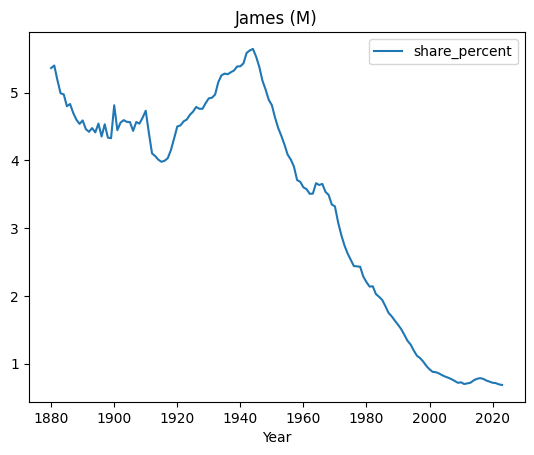

In [12]:
# share_percent for name_with_gender = James (M) for each year
# Step 1: Filter for 'James (M)'
james_m = df[df['name_with_gender'] == 'James (M)']

# Step 2: Select relevant columns (optional if you want to narrow down the displayed data)
james_m = james_m[['Year', 'name_with_gender', 'share_percent']]

# Display the result
james_m.plot(x='Year', y='share_percent', title='James (M)')

### Column with NameLength

In [13]:
# df['share_percent'] since 2000
# Step 1: Filter for years greater than or equal to 2000
df_since_2000 = df[df['Year'] >= 2000]

# Step 2:
df['share_percent'] = (df_since_2000['Count'] / total_counts_by_year_gender) * 100

print(df.sort_values(by='share_percent', ascending=False).head(40))

                Name Gender    Count  Year name_with_gender  share_percent
1344708        Jacob      M  34490.0  2000        Jacob (M)       1.756223
1374628        Jacob      M  32572.0  2001        Jacob (M)       1.676573
1353244      Michael      M  32042.0  2000      Michael (M)       1.631571
1405134        Jacob      M  30585.0  2002        Jacob (M)       1.575411
1383333      Michael      M  29688.0  2001      Michael (M)       1.528125
1435961        Jacob      M  29652.0  2003        Jacob (M)       1.501293
1413982      Michael      M  28257.0  2002      Michael (M)       1.455498
1352727      Matthew      M  28579.0  2000      Matthew (M)       1.455236
1342141        Emily      F  25959.0  2000        Emily (F)       1.429526
1433199        Emily      F  25692.0  2003        Emily (F)       1.406302
1467496        Jacob      M  27902.0  2004        Jacob (M)       1.405891
1347090       Joshua      M  27540.0  2000       Joshua (M)       1.402330
1372009        Emily     

Average name length by year

<Axes: xlabel='Year'>

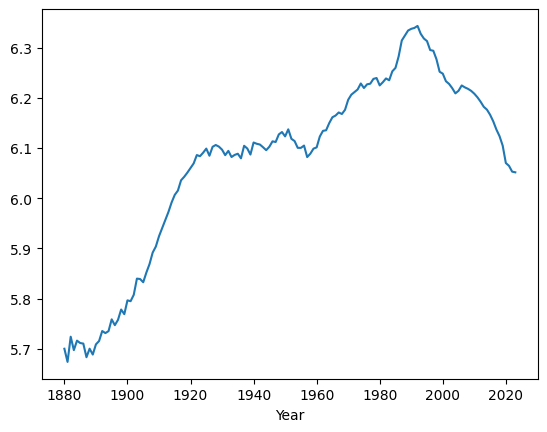

In [14]:
# Average name length by year
df['NameLength'] = df['Name'].str.len()
average_name_length_per_year = df.groupby('Year')['NameLength'].mean()
average_name_length_per_year.plot()


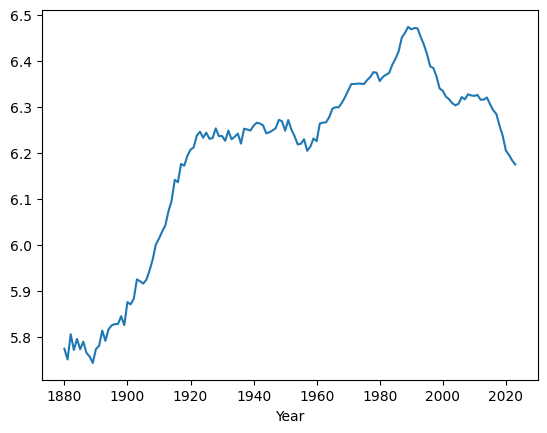

In [ ]:
# Step 1: Filter for gender "F"
df_f = df[df['Gender'] == 'F'].copy()

# Average name length for gender F by year
df_f['NameLength'] = df_f['Name'].str.len()

# Average name length for gender F by year
average_name_length_per_year_f = df_f.groupby('Year')['NameLength'].mean()
average_name_length_per_year_f.plot()


Export NameLength per year for both genders

In [18]:
# Step 1: Filter for gender "F"
df_f = df[df['Gender'] == 'F'].copy()
df_f['NameLength'] = df_f['Name'].str.len()
average_name_length_per_year_f = df_f.groupby('Year')['NameLength'].mean()

# Step 2: Filter for gender "M"
df_m = df[df['Gender'] == 'M'].copy()
df_m['NameLength'] = df_m['Name'].str.len()
average_name_length_per_year_m = df_m.groupby('Year')['NameLength'].mean()

# Step 3: Combine the results
average_name_length_per_year = pd.DataFrame({
    'F': average_name_length_per_year_f,
    'M': average_name_length_per_year_m
}).reset_index()

# Step 4: Export to csv
average_name_length_per_year.to_csv("average_name_length_per_year_by_gender.csv", index=False)

<Axes: xlabel='Year'>

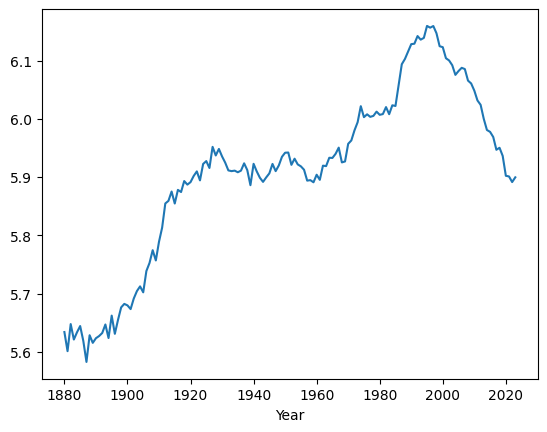

In [19]:
# Average name length for gender M by year
df_m['NameLength'] = df_m['Name'].str.len()
average_name_length_per_year_m = df_m.groupby('Year')['NameLength'].mean()
average_name_length_per_year_m.plot()

### Dataframes of longest and shortest names

Longest male names

In [ ]:
# Step 0: Add a filter for male names
df_males = df[df['Gender'] == 'M']

# Step 1: Filter for the longest names among males
df_males['NameLength'] = df_males['Name'].str.len()
longest_name_males = df_males[df_males['NameLength'] == df_males['NameLength'].max()]

# Step 2 & 3: Group by 'Name', sum 'Count', and sort for male names
longest_name_summed_males = longest_name_males.groupby('Name')['Count'].sum().reset_index()

# Merge to include NameLength for male names
longest_name_summed_males = longest_name_summed_males.merge(longest_name_males[['Name', 'NameLength']].drop_duplicates(), on='Name', how='left')

# Sort by 'Count' in descending order for male names
longest_name_summed_males = longest_name_summed_males.sort_values(by='Count', ascending=False)

# Step 4: Display the top 10 male names
longest_name_summed_males.head(10)


/var/folders/fg/9vmq_tp10lv_kw_hsjpvgq840000gn/T/ipykernel_8038/3519185263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_males['NameLength'] = df_males['Name'].str.len()


,Name,Count,NameLength
15,Franciscojavier,123,15
9,Christopherjohn,123,15
18,Johnchristopher,118,15
8,Christopherjame,108,15
11,Christophermich,52,15
29,Ryanchristopher,45,15
27,Muhammadibrahim,31,15
19,Jonathanmichael,25,15
3,Christianjoseph,22,15
10,Christopherjose,22,15


Longest names male in 2023

In [ ]:
# Adjusted Step 0: Filter for male names in 2023
df_males_2023 = df[(df['Gender'] == 'M') & (df['Year'] == 2023)]

# Step 1: Calculate 'NameLength' for male names in 2023
df_males_2023['NameLength'] = df_males_2023['Name'].str.len()
longest_name_males_2023 = df_males_2023[df_males_2023['NameLength'] == df_males_2023['NameLength'].max()]

# Step 2 & 3: Group by 'Name', sum 'Count', and sort for male names in 2023
longest_name_summed_males_2023 = longest_name_males_2023.groupby('Name')['Count'].sum().reset_index()

# Merge to include NameLength for male names in 2023
longest_name_summed_males_2023 = longest_name_summed_males_2023.merge(longest_name_males_2023[['Name', 'NameLength']].drop_duplicates(), on='Name', how='left')

# Sort by 'Count' in descending order for male names in 2023
longest_name_summed_males_2023 = longest_name_summed_males_2023.sort_values(by='Count', ascending=False)

# Step 4: Display the top 10 male names in 2023
longest_name_summed_males_2023.head(10)

/var/folders/fg/9vmq_tp10lv_kw_hsjpvgq840000gn/T/ipykernel_8038/4131880879.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_males_2023['NameLength'] = df_males_2023['Name'].str.len()


,Name,Count,NameLength
0,Muhammadibrahim,7,15
1,Muhammadmustafa,6,15


Longest female names

In [ ]:
# Step 0: Add a filter for female names
df_females = df[df['Gender'] == 'F']

# Step 1: Filter for the longest names among females
df_females['NameLength'] = df_females['Name'].str.len()
longest_name_females = df_females[df_females['NameLength'] == df_females['NameLength'].max()]

# Step 2 & 3: Group by 'Name', sum 'Count', and sort for female names
longest_name_summed_females = longest_name_females.groupby('Name')['Count'].sum().reset_index()

# Merge to include NameLength for female names
longest_name_summed_females = longest_name_summed_females.merge(longest_name_females[['Name', 'NameLength']].drop_duplicates(), on='Name', how='left')

# Sort by 'Count' in descending order for female names
longest_name_summed_females = longest_name_summed_females.sort_values(by='Count', ascending=False)

# Step 4: Display the top 10 female names
longest_name_summed_females.head(10)

/var/folders/fg/9vmq_tp10lv_kw_hsjpvgq840000gn/T/ipykernel_8038/350820670.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_females['NameLength'] = df_females['Name'].str.len()


,Name,Count,NameLength
3,Mariadelosangel,28,15
4,Mariadelrosario,16,15
0,Ashleyelizabeth,8,15
1,Hannahelizabeth,5,15
2,Laurenelizabeth,5,15
5,Sophiaelizabeth,5,15


Longest female name in 2023

In [ ]:
# Adjusted Step 0: Filter for female names in 2023
df_females_2023 = df[(df['Gender'] == 'F') & (df['Year'] == 2023)]

# Step 1: Calculate 'NameLength' for female names in 2023
df_females_2023['NameLength'] = df_females_2023['Name'].str.len()
longest_name_females_2023 = df_females_2023[df_females_2023['NameLength'] == df_females_2023['NameLength'].max()]

# Step 2 & 3: Group by 'Name', sum 'Count', and sort for female names in 2023
longest_name_summed_females_2023 = longest_name_females_2023.groupby('Name')['Count'].sum().reset_index()

# Merge to include NameLength for female names in 2023
longest_name_summed_females_2023 = longest_name_summed_females_2023.merge(longest_name_females_2023[['Name', 'NameLength']].drop_duplicates(), on='Name', how='left')

# Sort by 'Count' in descending order for female names in 2023
longest_name_summed_females_2023 = longest_name_summed_females_2023.sort_values(by='Count', ascending=False)

# Step 4: Display the top 10 female names in 2023
longest_name_summed_females_2023.head(10)

/var/folders/fg/9vmq_tp10lv_kw_hsjpvgq840000gn/T/ipykernel_8038/3918819156.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_females_2023['NameLength'] = df_females_2023['Name'].str.len()


,Name,Count,NameLength
0,Oluwafunmilayo,6,14


Average difference name length between male names and female names

In [ ]:
# how much longer is a woman's name on average compared to a man's name?
# Step 1: Calculate the average name length
average_name_length_m = df_m['NameLength'].mean()
average_name_length_f = df_f['NameLength'].mean()

# Step 2: Calculate the difference in average name length
average_name_length_difference = average_name_length_f - average_name_length_m

# Display the result
average_name_length_difference_rounded = round(average_name_length_difference, 2)
average_name_length_difference_rounded

0.31

Average difference name length between male names and female names in 2023

In [ ]:
# Filter for the year 2023
df_m_2023 = df_m[df_m['Year'] == 2023]
df_f_2023 = df_f[df_f['Year'] == 2023]

# Step 1: Calculate the average name length for 2023
average_name_length_m_2023 = df_m_2023['NameLength'].mean()
average_name_length_f_2023 = df_f_2023['NameLength'].mean()

# Step 2: Calculate the difference in average name length for 2023
average_name_length_difference_2023 = average_name_length_f_2023 - average_name_length_m_2023

# Display the result rounded to two decimal places
average_name_length_difference_rounded_2023 = round(average_name_length_difference_2023, 2)
average_name_length_difference_rounded_2023

0.27

Average name length in 2023

In [ ]:
# Filter for the year 2023
df_2023 = df[df['Year'] == 2023]

# Step 1: Calculate the average name length for 2023
average_name_length_2023 = df_2023['NameLength'].mean()


# Display the result rounded to two decimal places
average_name_length_rounded_2023 = round(average_name_length_2023, 2)
average_name_length_rounded_2023

6.05

Shortest names over all years

In [ ]:
# shortest name over all years
shortest_name = df[df['NameLength'] == df['NameLength'].min()].sort_values(by='Count', ascending=False)
shortest_name.head(20)

,Name,Gender,Count,Year,name_with_gender,NameLength
509304,Jo,F,8052,1954,Jo (F),2
520340,Jo,F,7656,1955,Jo (F),2
498471,Jo,F,7513,1953,Jo (F),2
487739,Jo,F,7092,1952,Jo (F),2
531516,Jo,F,6955,1956,Jo (F),2
436004,Jo,F,6726,1947,Jo (F),2
477201,Jo,F,6001,1951,Jo (F),2
446265,Jo,F,5985,1948,Jo (F),2
426017,Jo,F,5829,1946,Jo (F),2
456533,Jo,F,5802,1949,Jo (F),2


Shortes female name in 2023

In [ ]:
# Filter the dataframe for the year 2023 and female names
df_2023_female = df[(df['Year'] == 2023) & (df['Gender'] == 'F')]

# Find the shortest name length for females in 2023
shortest_name_length_2023_female = df_2023_female['NameLength'].min()

# Filter the dataframe for female names with the shortest length in 2023
shortest_names_2023_female = df_2023_female[df_2023_female['NameLength'] == shortest_name_length_2023_female]

# Find the most popular shortest female name in 2023 by sorting by 'Count' in descending order
most_popular_shortest_name_2023_female = shortest_names_2023_female.sort_values(by='Count', ascending=False).head(1)

# Display the result
most_popular_shortest_name_2023_female

,Name,Gender,Count,Year,name_with_gender,NameLength
2099905,Jo,F,46,2023,Jo (F),2


Shortes male name in 2023

In [ ]:
# Filter the dataframe for the year 2023 and male names
df_2023_male = df[(df['Year'] == 2023) & (df['Gender'] == 'M')]

# Find the shortest name length for males in 2023
shortest_name_length_2023_male = df_2023_male['NameLength'].min()

# Filter the dataframe for male names with the shortest length in 2023
shortest_names_2023_male = df_2023_male[df_2023_male['NameLength'] == shortest_name_length_2023_male]

# Find the most popular shortest male name in 2023 by sorting by 'Count' in descending order
most_popular_shortest_name_2023_male = shortest_names_2023_male.sort_values(by='Count', ascending=False).head(1)

# Display the result
most_popular_shortest_name_2023_male

,Name,Gender,Count,Year,name_with_gender,NameLength
2090388,Bo,M,630,2023,Bo (M),2


### Popularity

most popular male name per year and percentage of total


In [ ]:
# most popular male name per year and percentage of total

# Step 3: Filter for male names
male_names = df[df['Gender'] == 'M']

# Step 4: Find the maximum count for each year
max_counts_per_year = male_names.groupby('Year')['Count'].max().reset_index(name='MaxCount')

# Merge back with the male_names to get the rows with the maximum count
most_popular_per_year = pd.merge(male_names, max_counts_per_year, left_on=['Year', 'Count'], right_on=['Year', 'MaxCount'])

# Since there can be more than one name with the same highest count, drop duplicates
most_popular_per_year = most_popular_per_year.drop_duplicates(subset=['Year', 'Count'], keep='first')

# Calculate total counts per year for normalization, specifically for male names
total_counts_per_year = male_names.groupby('Year')['Count'].sum().reset_index(name='TotalCount')

# Merge to get the total counts per year for male names
most_popular_per_year = pd.merge(most_popular_per_year, total_counts_per_year, on='Year')

# Calculate the percentage of the most popular male name out of all male names for each year
most_popular_per_year['Percentage'] = (most_popular_per_year['Count'] / most_popular_per_year['TotalCount']) * 100

# Display the results
print(most_popular_per_year[['Year', 'Name', 'Percentage']])

# export to csv
most_popular_per_year.to_csv("most_pop_male_name_per_year.csv", index=False)

     Year  Name  Percentage
0    1880  John    8.738347
1    1881  John    8.704025
2    1882  John    8.406488
3    1883  John    8.500836
4    1884  John    8.203282
..    ...   ...         ...
139  2019  Liam    1.150024
140  2020  Liam    1.151162
141  2021  Liam    1.167536
142  2022  Liam    1.178734
143  2023  Liam    1.222767

[144 rows x 3 columns]


Count Johns in 1880

In [ ]:
# count John (M) in 1880
# Step 1: Filter for 'John (M)' in 1880
john_1880 = df[(df['name_with_gender'] == 'John (M)') & (df['Year'] == 1880)]

# Step 2: Select relevant columns (optional if you want to narrow down the displayed data)
john_1880 = john_1880[['Year', 'name_with_gender', 'Count']]
john_1880

,Year,name_with_gender,Count
1024,1880,John (M),9655


Sample for checking D3 visualization results

In [ ]:
# Step 3: Calculate share in percent of 'John (M)' in 1880
total_counts = df[df['Year'] == 1880]['Count'].sum()
john_1880['share_percent'] = (john_1880['Count'] / total_counts) * 100
john_1880

,Year,name_with_gender,Count,share_percent
1024,1880,John (M),9655,4.791944


Count all gender m per year

In [ ]:
# count of all gender m per year
# Step 1: Filter for gender "M"
df_m = df[df['Gender'] == 'M']

# Step 2 & 3: Group by 'year' and sum 'count'
counts_per_year_m = df_m.groupby('Year')['Count'].sum()

# Step 4: Reset index to have 'year' as a column
counts_per_year_m = counts_per_year_m.reset_index()

# Display the result
print(counts_per_year_m)

     Year    Count
0    1880   110490
1    1881   100735
2    1882   113686
3    1883   104625
4    1884   114442
5    1885   107799
6    1886   110784
7    1887   101411
8    1888   120852
9    1889   110580
10   1890   111024
11   1891   101191
12   1892   122035
13   1893   112318
14   1894   115768
15   1895   117394
16   1896   119566
17   1897   112757
18   1898   122685
19   1899   106211
20   1900   150475
21   1901   106467
22   1902   122660
23   1903   119231
24   1904   128122
25   1905   132307
26   1906   133154
27   1907   146826
28   1908   154338
29   1909   163996
30   1910   194208
31   1911   225969
32   1912   429942
33   1913   512565
34   1914   654763
35   1915   848577
36   1916   890082
37   1917   925483
38   1918  1013481
39   1919   980128
40   1920  1064353
41   1921  1101449
42   1922  1088157
43   1923  1096110
44   1924  1132747
45   1925  1115920
46   1926  1110498
47   1927  1126926
48   1928  1107613
49   1929  1075605
50   1930  1097370
51   1931  1

Sample Output elisabeth for checking D3 visualization results

In [ ]:
# count of names for elisabeth
elisabeth = df[df['Name'] == 'Elisabeth']
elisabeth_per_year = elisabeth.groupby('Year')['Count'].sum()
# display all years
# Set the option to display all rows
pd.set_option('display.max_rows', 1000)

elisabeth_per_year

# count of names for elisabeth for 1978
# elisabeth_1978 = elisabeth[elisabeth['Year'] == 1976]
# elisabeth_1978.plot(x='Name', y='Count', kind='bar')


Year
1880      24
1881      25
1882      29
1883      26
1884      32
1885      32
1886      43
1887      33
1888      33
1889      45
1890      23
1891      27
1892      55
1893      48
1894      58
1895      43
1896      50
1897      57
1898      66
1899      52
1900      54
1901      51
1902      50
1903      60
1904      53
1905      88
1906      82
1907      90
1908      89
1909      93
1910     102
1911      96
1912     131
1913     180
1914     217
1915     261
1916     278
1917     331
1918     292
1919     273
1920     259
1921     245
1922     222
1923     189
1924     200
1925     184
1926     182
1927     177
1928     156
1929     153
1930     146
1931     156
1932     114
1933     123
1934     122
1935     109
1936     120
1937     137
1938     128
1939     129
1940     114
1941     138
1942     149
1943     146
1944     150
1945     148
1946     146
1947     207
1948     175
1949     182
1950     187
1951     184
1952     201
1953     218
1954     259
1955     229
1956   

10 most popular male names in 2023

In [ ]:

# Filter the dataframe for the year 2023 and male names
df_2023_male = df[(df['Year'] == 2023) & (df['Gender'] == 'M')]

# show the 10 most popular male names in 2023
df_2023_male.nlargest(10, 'Count')


,Name,Gender,Count,Year,name_with_gender,NameLength
2104196,Liam,M,20802,2023,Liam (M),4
2108369,Noah,M,18995,2023,Noah (M),4
2108825,Oliver,M,14741,2023,Oliver (M),6
2098810,James,M,11670,2023,James (M),5
2094461,Elijah,M,11452,2023,Elijah (M),6
2106053,Mateo,M,11229,2023,Mateo (M),5
2114022,Theodore,M,11041,2023,Theodore (M),8
2097314,Henry,M,10941,2023,Henry (M),5
2104674,Lucas,M,10842,2023,Lucas (M),5
2115332,William,M,10598,2023,William (M),7


10 most popular female names in 2023

In [ ]:

# Filter the dataframe for the year 2023 and male names
df_2023_female = df[(df['Year'] == 2023) & (df['Gender'] == 'F')]

# show the 10 most popular male names in 2023
df_2023_female.nlargest(10, 'Count')

,Name,Gender,Count,Year,name_with_gender,NameLength
2108829,Olivia,F,15270,2023,Olivia (F),6
2094952,Emma,F,13527,2023,Emma (F),4
2091738,Charlotte,F,12596,2023,Charlotte (F),9
2087486,Amelia,F,12311,2023,Amelia (F),6
2112943,Sophia,F,11944,2023,Sophia (F),6
2106666,Mia,F,11359,2023,Mia (F),3
2097950,Isabella,F,10808,2023,Isabella (F),8
2089253,Ava,F,9682,2023,Ava (F),3
2095465,Evelyn,F,9082,2023,Evelyn (F),6
2104775,Luna,F,7811,2023,Luna (F),4


Sum all female names in 2023

In [20]:
# Step 1: Filter the dataframe for the year 2023 and female names
df_2023_female = df[(df['Year'] == 2023) & (df['Gender'] == 'F')]

# Step 2: Sum all counts for female names in 2023
total_counts_female_2023 = df_2023_female['Count'].sum()

# Output the total count
total_counts_female_2023

1596022.0

### Number of Unique names per year

In [ ]:
# Number of unique first names per year
unique_names_per_year = df.groupby("Year")["Name"].nunique()
unique_names_per_year.head(10)
# plot = df.groupby("Year")["Name"].nunique().plot()




Year
1880    1889
1881    1829
1882    2012
1883    1962
1884    2158
1885    2139
1886    2225
1887    2215
1888    2454
1889    2390
Name: Name, dtype: int64

Plot number of unique first names per year over time

<Axes: title={'center': 'Number of unique first names per year'}, xlabel='Year', ylabel='Number of unique names'>

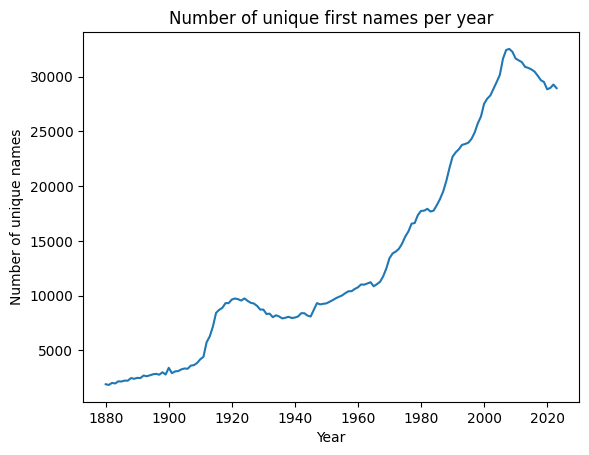

In [ ]:
unique_names_per_year.plot(title="Number of unique first names per year", xlabel="Year", ylabel="Number of unique names")

<Axes: xlabel='Year'>

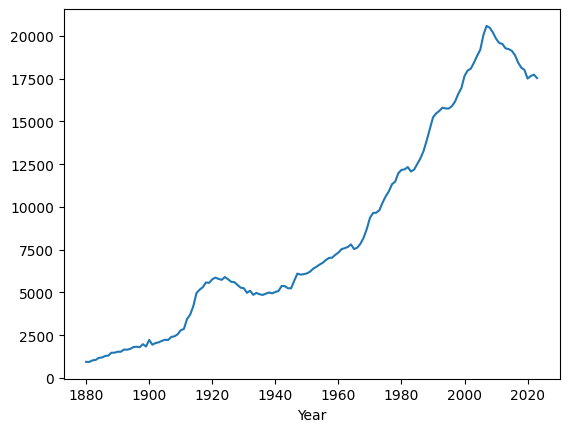

In [ ]:
# Filter for only female entries
female_data = combined_data[combined_data['Gender'] == 'F']

# Group by year and count unique names
unique_female_names_per_year = female_data.groupby('Year')['Name'].nunique()

# Plot the count of unique female names for every year
unique_female_names_per_year.plot()

<Axes: xlabel='Year'>

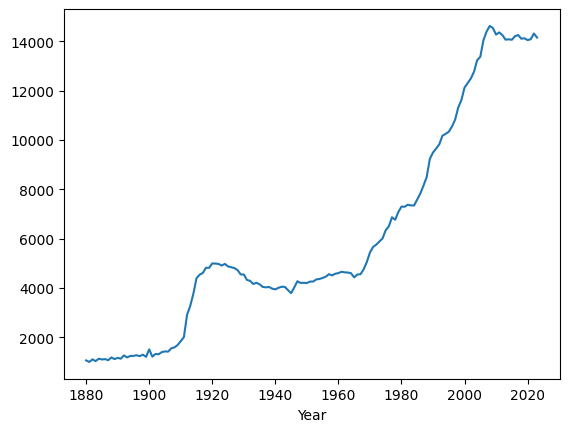

In [ ]:
# Filter for only male entries
male_data = combined_data[combined_data['Gender'] == 'M']

# Group by year and count unique names
unique_male_names_per_year = male_data.groupby('Year')['Name'].nunique()

# Plot the count of unique male names for every year
unique_male_names_per_year.plot()

Plot the share of unique first names per year

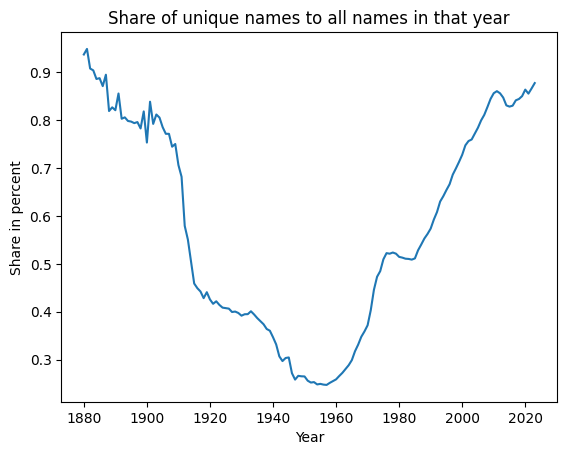

In [ ]:
# calculate the share of unique name to all names in that year
# Step 1 & 2: Group by 'year' and calculate total counts
total_counts_by_year = df.groupby('Year')['Count'].transform('sum')

# Step 3: Calculate share in percent
df['share_of_unique_names'] = (df.groupby('Year')['Name'].transform('nunique') / total_counts_by_year) * 100

# Plot the share of unique names to all names in that year
df.groupby('Year')['share_of_unique_names'].mean().plot(title='Share of unique names to all names in that year', xlabel='Year', ylabel='Share in percent')

# export to csv just column year and share of unique names
df_unique_names = df[['Year', 'share_of_unique_names']].drop_duplicates()
df_unique_names[['Year', 'share_of_unique_names']].to_csv("babynames_with_share_all.csv", index=False)


Plot the share of unique female first names per year

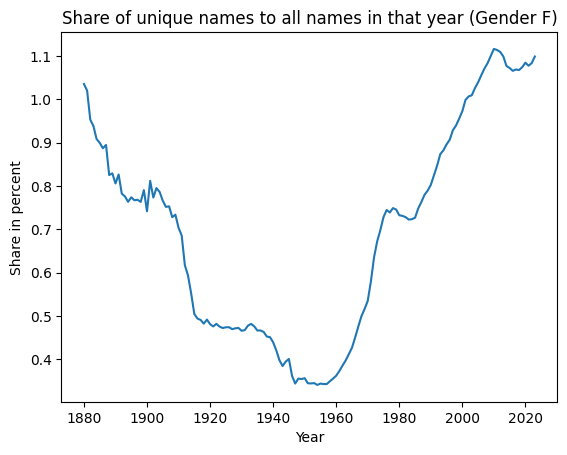

In [ ]:

# Filter the DataFrame for Gender F
df_f = df[df['Gender'] == 'F'].copy()

# Step 1 & 2: Group by 'Year' and calculate total counts for Gender F
total_counts_by_year_f = df_f.groupby('Year')['Count'].transform('sum')

# Step 3: Calculate share in percent for Gender F
df_f['share_of_unique_names'] = (df_f.groupby('Year')['Name'].transform('nunique') / total_counts_by_year_f) * 100

# Plot the share of unique names to all names in that year for Gender F
df_f.groupby('Year')['share_of_unique_names'].mean().plot(title='Share of unique names to all names in that year (Gender F)', xlabel='Year', ylabel='Share in percent')

# export to csv just column year and share of unique names
df_unique_names_f = df_f[['Year', 'share_of_unique_names']].drop_duplicates()
df_unique_names_f[['Year', 'share_of_unique_names']].to_csv("babynames_with_share_f.csv", index=False)


Plot the share of unique male first names per year

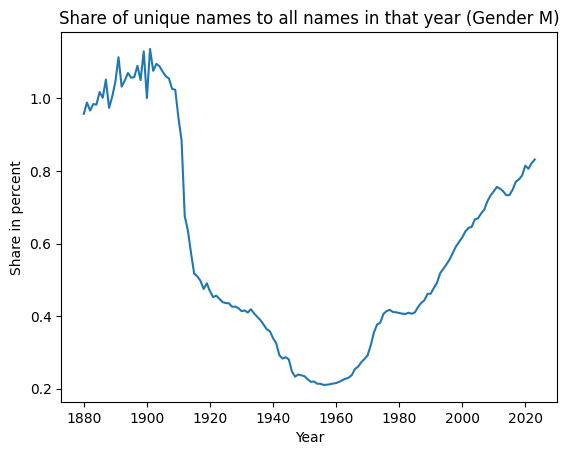

In [ ]:
# Filter the DataFrame for Gender M
df_m = df[df['Gender'] == 'M'].copy()

# Step 1 & 2: Group by 'Year' and calculate total counts for Gender M
total_counts_by_year_m = df_m.groupby('Year')['Count'].transform('sum')

# Step 3: Calculate share in percent for Gender M
df_m['share_of_unique_names'] = (df_m.groupby('Year')['Name'].transform('nunique') / total_counts_by_year_m) * 100

# Plot the share of unique names to all names in that year for Gender M
df_m.groupby('Year')['share_of_unique_names'].mean().plot(title='Share of unique names to all names in that year (Gender M)', xlabel='Year', ylabel='Share in percent')

# export to csv just column year and share of unique names Gender M
df_unique_names_m = df_m[['Year', 'share_of_unique_names']].drop_duplicates()
df_unique_names_m[['Year', 'share_of_unique_names']].to_csv("babynames_with_share_m.csv", index=False)

In [ ]:
# Step 1: Filter for gender "M"
df_m = df[df['Gender'] == 'M'].copy()

#count of unique names per year with Gender M
unique_names_per_year_m = df_m.groupby("Year")["Name"].nunique()
unique_names_per_year_m.head(20)

#count of all names per year with Gender M
total_counts_by_year_m = df_m.groupby("Year")["Count"].sum()
total_counts_by_year_m.head(20)

Year
1880    110490
1881    100735
1882    113686
1883    104625
1884    114442
1885    107799
1886    110784
1887    101411
1888    120852
1889    110580
1890    111024
1891    101191
1892    122035
1893    112318
1894    115768
1895    117394
1896    119566
1897    112757
1898    122685
1899    106211
Name: Count, dtype: int64

### Calculations Name length

Just in 2023

Average name length in 2023

Shortest names sorted by count

Shortest and most frequently given female name in 2023

Shortest and most frequently given male name in 2023

Most popular male name per year and percentage of total